In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow as imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
imgs=[]

rock = []
for filename in os.listdir('/content/drive/MyDrive/UniStuff2022/ImageDataset/rock/'):
  rock.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/rock/{filename}'))
  imgs.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/rock/{filename}'))
rock=np.array(rock)

paper = []
for filename in os.listdir('/content/drive/MyDrive/UniStuff2022/ImageDataset/paper/'):
  paper.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/paper/{filename}'))
  imgs.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/paper/{filename}'))
paper=np.array(paper)

scissors = []
for filename in os.listdir('/content/drive/MyDrive/UniStuff2022/ImageDataset/scissors/'):
  scissors.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/scissors/{filename}'))
  imgs.append(cv.imread(f'/content/drive/MyDrive/UniStuff2022/ImageDataset/scissors/{filename}'))
scissors=np.array(scissors)

imgs=np.array(imgs)

In [3]:
def toGrey (image):
  #Changing Image to Grey scale
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  return image

In [4]:
def resize(image):
  #Resizing image to 100x100
  image = cv.resize(image, (100,100), interpolation = cv.INTER_AREA)
  return image

In [5]:
def bgremove(image):
  #Removing green background and border from image
  lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
  a_channel = lab[:,:,1]
  th = cv.threshold(a_channel,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
  masked = cv.bitwise_and(image, image, mask = th)
  mlab = cv.cvtColor(masked, cv.COLOR_BGR2LAB)
  dst = cv.normalize(mlab[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
  threshold_value = 100
  dst_th = cv.threshold(dst, threshold_value, 255, cv.THRESH_BINARY_INV)[1]
  mlab2 = mlab.copy()
  mlab[:,:,1][dst_th == 255] = 127
  img2 = cv.cvtColor(mlab, cv.COLOR_LAB2BGR)
  img2[th==0]=(255,255,255)
  return img2

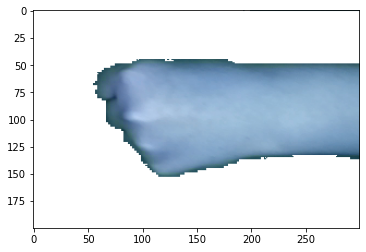

In [17]:
x= bgremove(rock[300])
plt.imshow(x)

In [6]:
def canny(image):
  #Detection of hand edges
  image = cv.Canny(image,100,150)
  return image

In [7]:
def vedges(img): 
  #Extract vertical edges
  vertical = np.array([[10, 0, -10],
                    [10, 0, -10],
                    [10 ,0, -10]])
  image = cv.filter2D(src=img, ddepth=-1, kernel=vertical)
  return image

In [8]:
def hedges(image):
  #Extract horizontal edges
  horizontal = np.array([[10, 10, 10],
                    [0, 0, 0],
                    [-10, -10, -10]])
  image = cv.filter2D(src=image, ddepth=-1, kernel=horizontal)
  return image

In [9]:
def harris(image):   
  #Detection of hand corners
  dst = cv.cornerHarris(image,2,3,0.04)
  dst = cv.dilate(dst,None)
  return dst

In [18]:
def contour(image):
    #Extracts outline of image
    contours, hierarchy = cv.findContours(image, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return contours

In [21]:
x=resize(x)
x=toGrey(x)
x= contour(rock[300])
plt.imshow(x)

error: ignored

In [11]:
def orb(image):
  #Oriented FAST and Rotated BRIEF (ORB). This method is rotation invariant and resistant to noise
  orb = cv.ORB_create()
  keypoints=orb.detect(image,None)
  image=cv.drawKeypoints(image,keypoints,image)
  return image

In [12]:
def closing(image):
  #Prefroming closing
  binr = cv.threshold(image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
  kernel = np.ones((3, 3), np.uint8)
  closing = cv.morphologyEx(binr, cv.MORPH_CLOSE, kernel, iterations=1)
  return closing

In [13]:
def extractAll(image,rps):
  #Perform complete feature extraction using all the functions
  img=resize(toGrey(image))
  climg=closing(img)
  cloimg=np.std(closing(img).flatten())
  bgRemoved=np.mean(bgremove(image).flatten())
  hedge=np.std(hedges(climg).flatten())
  vedge=np.mean(vedges(climg).flatten())
  har=np.std(harris(climg).flatten())
  morbed=np.var(orb(climg).flatten())
  contoured=np.mean(contour(img))
  cannyed=np.var(canny(climg).flatten())

  output=np.concatenate((bgRemoved, cloimg, cannyed, hedge, vedge, contoured, har, morbed, rps),axis=None)
  return output
  

In [14]:
#Perform extraction function on entire dataset
theRock=[]
for i in range(len(rock)):
  theRock.append(extractAll(rock[i],"Rock"))

thePaper=[]
for i in range(len(paper)):
  thePaper.append(extractAll(paper[i],"Paper"))

theScissors=[]
for i in range(len(scissors)):
  theScissors.append(extractAll(scissors[i],"Scissors"))

theRocknp=np.array(theRock)
thePapernp=np.array(thePaper)
theScissorsnp=np.array(theScissors)

rockF=[]
rockF4=[]
rockF2=[]
rockLbl=[]

paperF=[]
paperF4=[]
paperF2=[]
paperLbl=[]

scissorsF=[]
scissorsF4=[]
scissorsF2=[]
scissorsLbl=[]

#Put features and labels in np array
for i in range(len(theRocknp)):
  rockF.append(theRocknp[i][:8])
  rockF4.append(theRocknp[i][:4])
  rockF2.append(theRocknp[i][:2])
  rockLbl.append(theRocknp[i][8])  

for i in range(len(thePapernp)):
  paperF.append(thePapernp[i][:8])
  paperF4.append(thePapernp[i][:4])
  paperF2.append(thePapernp[i][:2])
  paperLbl.append(thePapernp[i][8])

for i in range(len(theScissorsnp)):
  scissorsF.append(theScissorsnp[i][:8])
  scissorsF4.append(theScissorsnp[i][:4])
  scissorsF2.append(theScissorsnp[i][:2])
  scissorsLbl.append(theScissorsnp[i][8])


f=np.concatenate((rockF,paperF,scissorsF))
f4=np.concatenate((rockF4,paperF4,scissorsF4))
f2=np.concatenate((rockF2,paperF2,scissorsF2))
l=np.concatenate((rockLbl,paperLbl,scissorsLbl))
l2=l
l4=l

In [15]:
#Training the Classifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree



f_train, f_test, l_train, l_test= train_test_split(
        f, l, test_size=0.3,shuffle=True)

f4_train, f4_test, l4_train, l4_test= train_test_split(
        f4, l4, test_size=0.3,shuffle=True)

f2_train, f2_test, l2_train, l2_test= train_test_split(
        f2, l2, test_size=0.3,shuffle=True)


#Randeom Forest Classifier 
clf2 = RandomForestClassifier(n_estimators=200)
clf2.fit(f2_train, l2_train)
l2_pred = clf2.predict(f2_test)
print(f"Randeom Forest Accuracy (2 featuers): {accuracy_score(l2_test, l2_pred):%}")

clf4 = RandomForestClassifier(n_estimators=200)
clf4.fit(f4_train, l4_train)
l4_pred = clf4.predict(f4_test)
print(f"Randeom Forest Accuracy (4 featuers): {accuracy_score(l4_test, l4_pred):%}")

clf = RandomForestClassifier(n_estimators=200)
clf.fit(f_train, l_train)
l_pred = clf.predict(f_test)
print(f"Randeom Forest Accuracy (8 featuers): {accuracy_score(l_test, l_pred):%}")

#Decision trees Classifier
tree_clf = tree.DecisionTreeClassifier()
tree_clf= tree_clf.fit(f_train, l_train)
predictive_labels=tree_clf.predict(f_test)
print(f"\nDecision Trees Accuracy  (8 features): {accuracy_score(l_test, predictive_labels):%}")

#GradientBoostingClassifier
clf_GB = GradientBoostingClassifier(random_state=35)
clf_GB.fit(f_train, l_train)
predictive_labels=clf_GB.predict(f_test)
print(f"\nGradientBoosting Accuracy (8 features): {accuracy_score(l_test, predictive_labels):%}")



Randeom Forest Accuracy (2 featuers): 62.557078%
Randeom Forest Accuracy (4 featuers): 79.147641%
Randeom Forest Accuracy (8 featuers): 91.019787%

Decision Trees Accuracy  (8 features): 86.757991%

GradientBoosting Accuracy (8 features): 92.237443%


Player 1 Wins


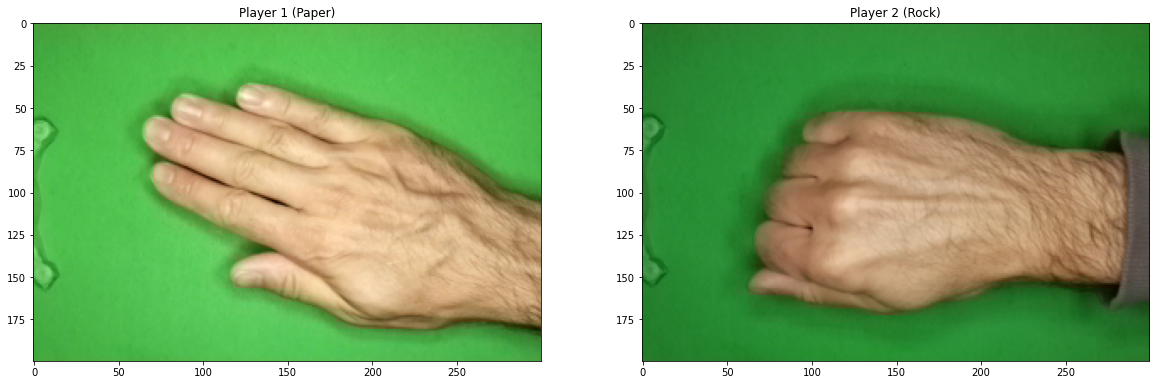

In [23]:
#Play a game of RPS
import random 

p1=random.randint(0,2187)
p2=random.randint(0,2187)

while(p2==p1):
  p2=random.randint(0,2187)

player1=extractAll(imgs[p1],"unknown")
player2=extractAll(imgs[p2],"unknown")

pred1=clf_GB.predict([player1[:8]])
pred2=clf_GB.predict([player2[:8]])


imgP1 = cv.cvtColor(imgs[p1], cv.COLOR_BGR2RGB)
imgP2 = cv.cvtColor(imgs[p2], cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1, 2,figsize=(20,20))
ax[0].imshow(imgP1)
ax[1].imshow(imgP2)
ax[0].set_title("Player 1 "+"("+pred1[0]+")")
ax[1].set_title("Player 2 "+"("+pred2[0]+")")


if(pred1[0]=='Paper' and pred2[0]=="Scissors"):
  print("Player 2 Wins")
elif (pred1[0]=='Scissors' and pred2[0]=="Paper"):
  print("Player 1 Wins")
elif (pred1[0]=='Paper' and pred2[0]=="Rock"):
  print("Player 1 Wins")
elif (pred1[0]=='Rock' and pred2[0]=="Paper"):
  print("Player 2 Wins")
elif (pred1[0]=='Scissors' and pred2[0]=="Rock"):
  print("Player 2 Wins")
elif (pred1[0]=='Rock' and pred2[0]=="Scissors"):
  print("Player 1 Wins")
else:
  print("Draw")
